In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime 
import os
from warnings import filterwarnings
filterwarnings('ignore')

# Data processing and cleaning
Debugging on 31.05.2025

In [7]:
# === Step 1: Import Excel files ===
benchmark = pd.read_excel('benchmark.xlsx')
all_world_esg = pd.read_excel('all_world_esg.xlsx')
corporate_bonds = pd.read_excel('corporate_bonds.xlsx')
emerging_bonds = pd.read_excel('emerging_bonds.xlsx')
emerging_esg_bonds = pd.read_excel('emerging_esg_bods.xlsx')
emerging_market_equities = pd.read_excel('emerging_markets_equities.xlsx')
esg_bonds = pd.read_excel('esg_bonds.xlsx')
ftse_100 = pd.read_excel('ftse_100.xlsx')
ftse_all_world = pd.read_excel('ftse_all_world.xlsx')
gld = pd.read_excel('gld.xlsx')
global_bonds = pd.read_excel('global_bonds.xlsx')
global_clean_energy = pd.read_excel('global_clean_energy.xlsx')
green_bonds = pd.read_excel('green_bonds.xlsx')
high_div_all_world = pd.read_excel('high_div_all_world.xlsx')
high_yield_bonds = pd.read_excel('high_yield_corporate.xlsx')
inflation_linked_bonds = pd.read_excel('inflation_linked_gilts.xlsx')
reits = pd.read_excel('reits.xlsx')
uk_div = pd.read_excel('uk_div.xlsx')
uk_gilts = pd.read_excel('uk_gilts.xlsx')
uk_property = pd.read_excel('uk_proprietry.xlsx')
uk_socially_responsible = pd.read_excel('uk_socially_responsible.xlsx')
money_market_funds = pd.read_excel('money_market.xlsx')


# === Step 2: Drop 'Adjusted Close' if it exists ===
for df in [all_world_esg, corporate_bonds, emerging_bonds, emerging_esg_bonds, emerging_market_equities, esg_bonds, ftse_100, ftse_all_world, gld, global_bonds, global_clean_energy, green_bonds, high_div_all_world, high_yield_bonds, inflation_linked_bonds, reits, uk_div, uk_gilts, uk_property, uk_socially_responsible, money_market_funds]:
    if 'Adjusted Close' in df.columns:
        df.drop('Adjusted Close', axis=1, inplace=True)
        
#rename the date column to 'Exchange Date' for money market funds 
money_market_funds.rename(columns={'Date': 'Exchange Date'}, inplace=True)

# === Step 3: Set 'Exchange Date' as datetime index ===
dfs = {
    'benchmark': benchmark,
    'gld': gld,
    'all_world_esg': all_world_esg,
    'corporate_bonds': corporate_bonds,
    'emerging_bonds': emerging_bonds,
    'emerging_esg_bonds': emerging_esg_bonds,
    'emerging_market_equities': emerging_market_equities,
    'esg_bonds': esg_bonds,
    'ftse_100': ftse_100,
    'ftse_all_world': ftse_all_world,
    'global_bonds': global_bonds,
    'global_clean_energy': global_clean_energy,
    'green_bonds': green_bonds,
    'high_div_all_world': high_div_all_world,
    'high_yield_bonds': high_yield_bonds,
    'inflation_linked_bonds': inflation_linked_bonds,
    'reits': reits,
    'uk_div': uk_div,
    'uk_gilts': uk_gilts,
    'uk_property': uk_property,
    'uk_socially_responsible': uk_socially_responsible,
    'money_market_funds': money_market_funds
}

for df in dfs.values():
    df['Exchange Date'] = pd.to_datetime(df['Exchange Date'])
    df.set_index('Exchange Date', inplace=True)

# === Step 4: Extract and rename 'Close' columns ===
dfs_close = {
    name: df[['Close']].rename(columns={'Close': name})
    for name, df in dfs.items()
}

# === Step 5: Concatenate all close prices (inner join to align dates) ===
all_closing_prices = pd.concat(dfs_close.values(), axis=1, join='inner')


In [9]:
all_closing_prices = all_closing_prices.sort_index(ascending=True)
all_closing_prices.dropna(inplace=True)
all_closing_prices

,benchmark,gld,all_world_esg,corporate_bonds,emerging_bonds,emerging_esg_bonds,emerging_market_equities,esg_bonds,ftse_100,ftse_all_world,...,green_bonds,high_div_all_world,high_yield_bonds,inflation_linked_bonds,reits,uk_div,uk_gilts,uk_property,uk_socially_responsible,money_market_funds
Exchange Date,,,,,,,,,,,,,,,,,,,,,
2023-05-31,1040.49,146.594396,24.571768,118.230,55.781543,35.710,23.148599,3.895083,7.342,85.605,...,18.793623,46.3850,77.377448,13.023,103.579249,6.7780,10.0425,4.37000,15.113,111.2178
2023-06-01,1036.75,146.713984,24.822256,118.680,55.901231,35.620,23.472960,3.902733,7.397,85.890,...,18.646632,46.4700,77.711002,13.056,103.177871,6.8410,10.0875,4.41225,15.247,111.2302
2023-06-02,1036.23,145.444707,25.417678,118.610,56.217287,35.900,24.076100,3.893455,7.506,87.785,...,18.709789,47.4675,78.118507,13.085,106.511557,6.9630,10.0850,4.53350,15.494,111.2676
2023-06-05,1038.36,146.449667,25.424061,118.060,56.311837,36.180,24.049135,3.891141,7.503,88.185,...,18.734365,47.6150,78.128582,13.130,105.831714,6.9610,10.0325,4.53100,15.481,111.2801
2023-06-06,1038.26,146.763643,25.643795,118.420,56.328618,36.250,24.259385,3.892707,7.536,88.330,...,18.770035,47.7150,78.211245,13.284,107.257227,7.0170,10.0625,4.55550,15.602,111.2926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-12,1000.37,226.382866,28.006519,120.740,55.797048,33.430,28.036887,4.034323,8.459,107.250,...,18.083906,54.2350,78.287576,11.570,110.369372,8.0975,9.9750,4.21600,17.614,121.7844
2025-05-13,998.04,225.089109,27.780984,120.790,55.903196,33.440,27.863665,4.027132,8.454,107.820,...,17.904303,54.1150,78.230849,11.545,109.149802,8.0730,9.9500,4.16450,17.600,121.7977
2025-05-14,995.57,221.101272,28.063782,120.660,55.865730,33.350,28.207080,4.037182,8.440,107.740,...,17.908856,53.8700,78.249103,11.470,108.867111,8.0840,9.9275,4.18600,17.608,121.8110


# Portfolio Creation with assumed weights

In [26]:
# === Step 6: Portfolio Weights ===
weights = {
    'gld': 0.05,
    'all_world_esg': 0.02,
    'corporate_bonds': 0.02,
    'emerging_bonds': 0.02,
    'emerging_esg_bonds': 0.05,
    'emerging_market_equities': 0.05,
    'esg_bonds': 0.05,
    'ftse_100': 0.20,
    'ftse_all_world': 0.15,
    'global_bonds': 0.05,
    'global_clean_energy': 0.04,
    'green_bonds': 0.05,
    'high_div_all_world': 0.05,
    'high_yield_bonds': 0.02,
    'inflation_linked_bonds': 0.02,
    'reits': 0.02,
    'uk_div': 0.05,
    'uk_gilts': 0.03,
    'uk_property': 0.02,
    'uk_socially_responsible': 0.03,
    'money_market_funds': 0.05
}

# === Step 7: Compute Portfolio Value ===
aligned_prices = all_closing_prices[list(weights.keys())].dropna()
normalized_prices = aligned_prices / aligned_prices.iloc[0]
weighted_prices = normalized_prices.multiply(pd.Series(weights), axis=1)
initial_capital = 25000000
portfolio_value = weighted_prices.sum(axis=1) * 25000000

# === Step 8: Portfolio Performance Metrics ===
daily_returns = portfolio_value.pct_change().dropna()
cumulative_return = (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) - 1
annualized_return = (1 + cumulative_return) ** (252 / len(portfolio_value)) - 1
annualized_volatility = daily_returns.std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility
rolling_max = portfolio_value.cummax()
drawdown = (portfolio_value - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# === Step 9: Benchmark Performance Metrics ===
benchmark_prices = all_closing_prices['benchmark'].loc[portfolio_value.index]
benchmark_returns = benchmark_prices.pct_change().dropna()
benchmark_cumulative_return = (benchmark_prices.iloc[-1] / benchmark_prices.iloc[0]) - 1
benchmark_annualized_return = (1 + benchmark_cumulative_return) ** (252 / len(benchmark_prices)) - 1
benchmark_annualized_volatility = benchmark_returns.std() * np.sqrt(252)
benchmark_sharpe_ratio = benchmark_annualized_return / benchmark_annualized_volatility
benchmark_drawdown = (benchmark_prices - benchmark_prices.cummax()) / benchmark_prices.cummax()
benchmark_max_drawdown = benchmark_drawdown.min()

# === Step 10: Metrics Comparison Table ===
comparison_metrics = pd.DataFrame({
    "Portfolio": {
        "Cumulative Return": cumulative_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown
    },
    "Benchmark": {
        "Cumulative Return": benchmark_cumulative_return,
        "Annualized Return": benchmark_annualized_return,
        "Annualized Volatility": benchmark_annualized_volatility,
        "Sharpe Ratio": benchmark_sharpe_ratio,
        "Max Drawdown": benchmark_max_drawdown
    }
}).round(4)


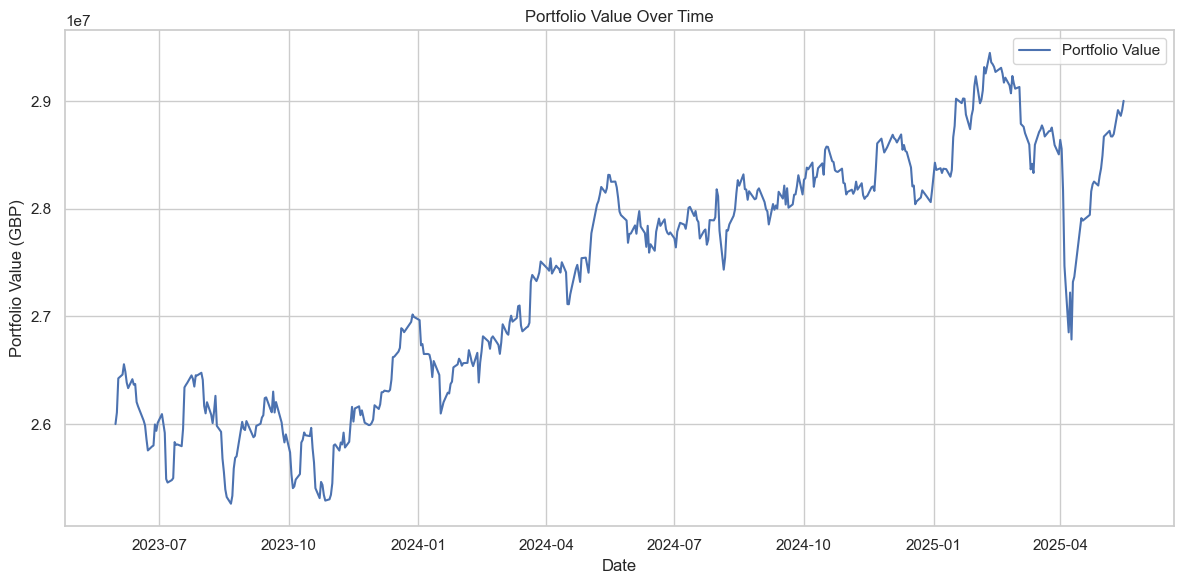

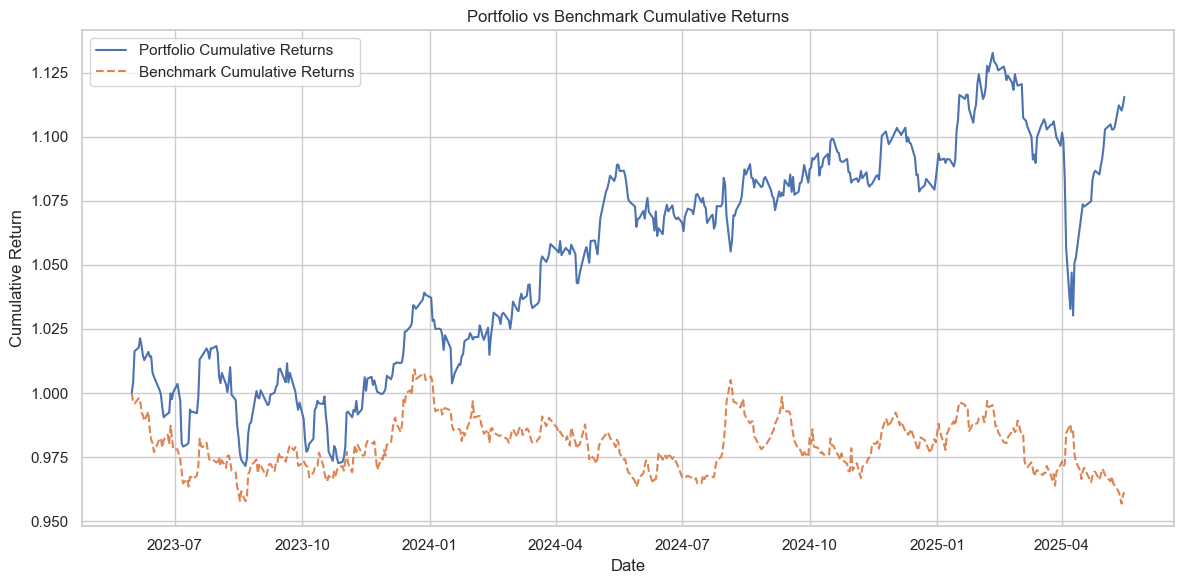

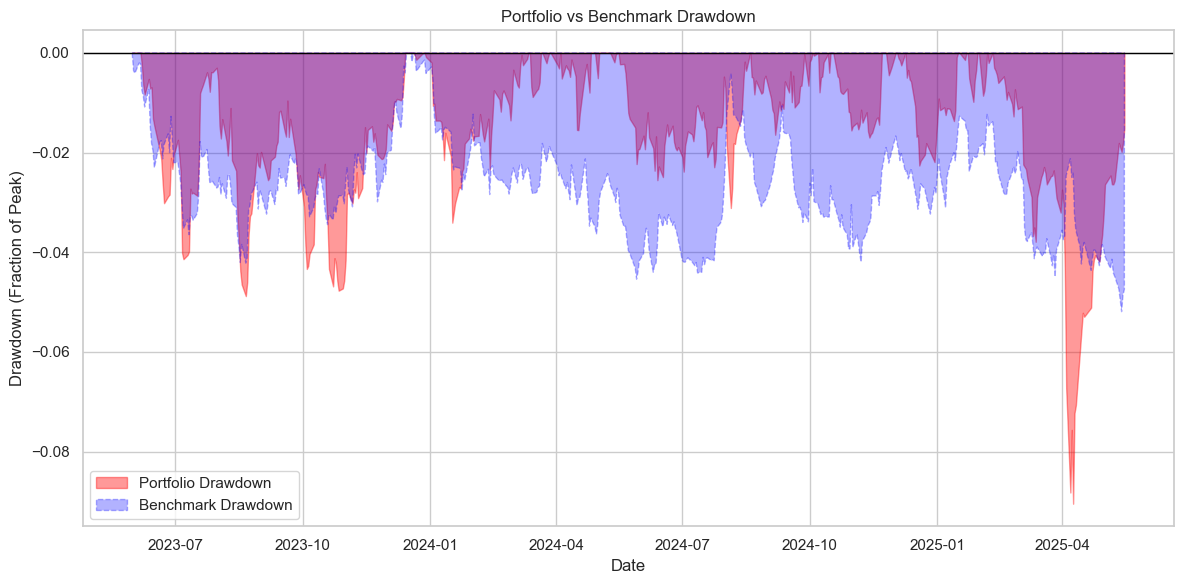


=== Portfolio vs Benchmark Metrics ===
                       Portfolio  Benchmark
Cumulative Return         0.1155    -0.0387
Annualized Return         0.0585    -0.0203
Annualized Volatility     0.0758     0.0518
Sharpe Ratio              0.7713    -0.3914
Max Drawdown             -0.0904    -0.0519


In [27]:
# Plot Portfolio Value
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (GBP)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Cumulative Returns
portfolio_cumulative = portfolio_value / portfolio_value.iloc[0]
benchmark_cumulative = benchmark_prices / benchmark_prices.iloc[0]

plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative, label='Portfolio Cumulative Returns')
plt.plot(benchmark_cumulative, label='Benchmark Cumulative Returns', linestyle='--')
plt.title('Portfolio vs Benchmark Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Drawdowns
plt.figure(figsize=(12, 6))
plt.fill_between(drawdown.index, drawdown, 0, color='red', alpha=0.4, label='Portfolio Drawdown')
plt.fill_between(benchmark_drawdown.index, benchmark_drawdown, 0, color='blue', alpha=0.3, label='Benchmark Drawdown', linestyle='--')
plt.title('Portfolio vs Benchmark Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown (Fraction of Peak)')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("\n=== Portfolio vs Benchmark Metrics ===")
print(comparison_metrics)

Saved: bond_corr.png
Saved: equity_corr.png


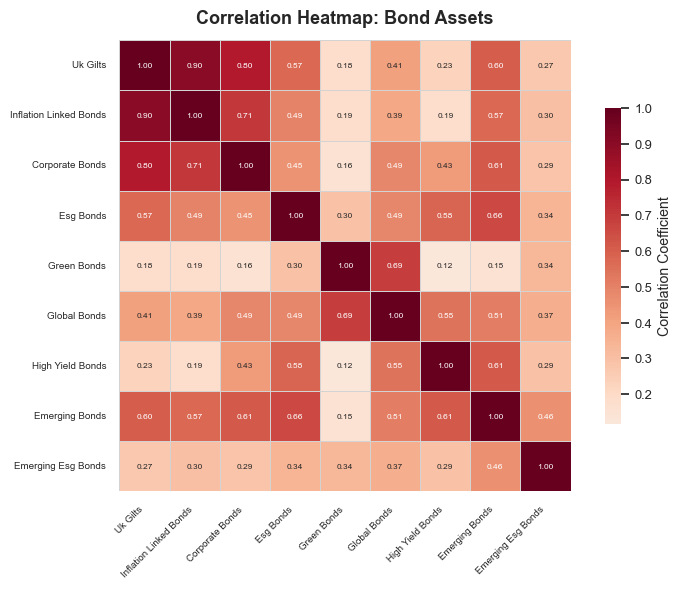

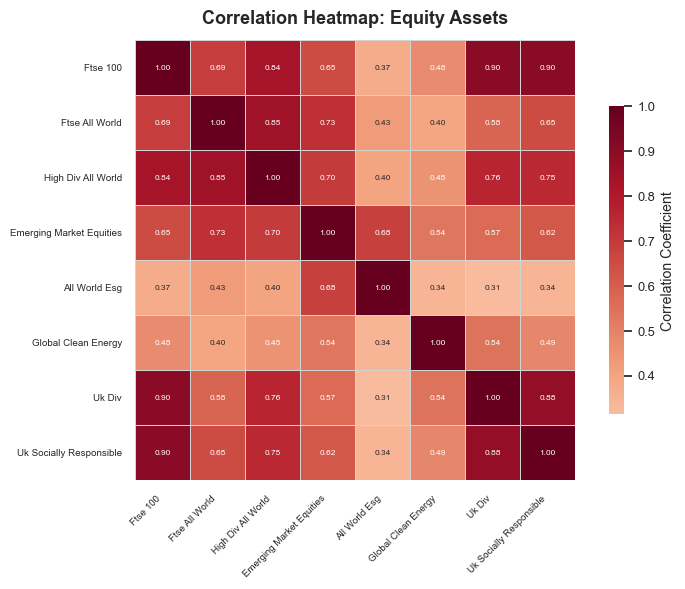

In [40]:
# Define asset groups
bond_assets = [
    'uk_gilts', 'inflation_linked_bonds', 'corporate_bonds', 'esg_bonds', 
    'green_bonds', 'global_bonds', 'high_yield_bonds', 'emerging_bonds', 
    'emerging_esg_bonds'
]

equity_assets = [
    'ftse_100', 'ftse_all_world', 'high_div_all_world', 'emerging_market_equities',
    'all_world_esg', 'global_clean_energy', 'uk_div', 'uk_socially_responsible'
]

# Prettify
def pretty(name):
    return name.replace('_', ' ').title()

def plot_heatmap(assets, title, filename=None, figsize=(8, 6), dpi=600):
    data = all_closing_prices[assets].pct_change().dropna()
    corr = data.corr()

    # Format labels
    corr.index = [pretty(col) for col in corr.index]
    corr.columns = [pretty(col) for col in corr.columns]

    plt.figure(figsize=figsize)
    sns.set(style="white", font_scale=0.85)

    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap="RdBu_r",
        center=0,
        square=True,
        linewidths=0.4,
        linecolor='lightgray',
        cbar_kws={"shrink": 0.7, "label": "Correlation Coefficient"},
        annot_kws={"size": 6}
    )

    plt.title(title, fontsize=13, fontweight='bold', pad=12)
    plt.xticks(rotation=45, ha='right', fontsize=7)
    plt.yticks(rotation=0, fontsize=7)
    plt.tight_layout()

    if filename:
        plt.savefig(filename, dpi=dpi, bbox_inches='tight', format='png')
        print(f"Saved: {filename}")
    else:
        plt.show()
        
plot_heatmap(bond_assets, "Correlation Heatmap: Bond Assets", filename="bond_corr.png")
plot_heatmap(equity_assets, "Correlation Heatmap: Equity Assets", filename="equity_corr.png")
plt.savefig("bond_corr.pdf", dpi=600, bbox_inches='tight')



=== Linear Regression Results ===
Beta (Market Sensitivity): 0.2329
Alpha (Intercept): 0.000255
Annualized Alpha: 0.0643
R-squared: 0.0253


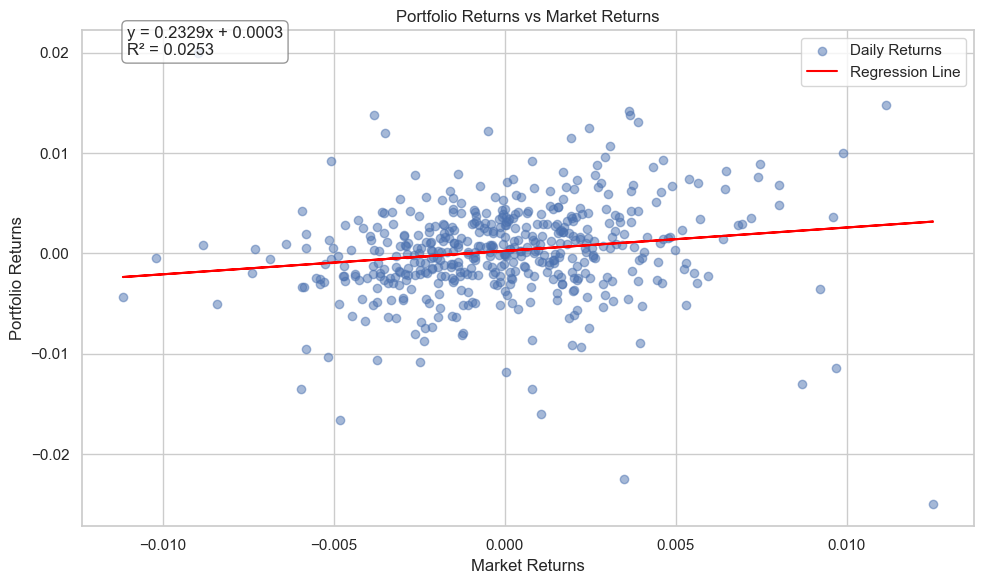

In [28]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Calculate daily returns for both portfolio and benchmark
portfolio_daily_returns = portfolio_value.pct_change().dropna()
benchmark_daily_returns = benchmark_prices.pct_change().dropna()

# Prepare data for regression
X = benchmark_daily_returns.values.reshape(-1, 1)  # Market returns
y = portfolio_daily_returns.values  # Portfolio returns

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Calculate R-squared
r_squared = model.score(X, y)

# Calculate beta (slope)
beta = model.coef_[0]

# Calculate alpha (intercept)
alpha = model.intercept_

# Calculate annualized alpha
annualized_alpha = alpha * 252  # Assuming 252 trading days

# Print regression results
print("\n=== Linear Regression Results ===")
print(f"Beta (Market Sensitivity): {beta:.4f}")
print(f"Alpha (Intercept): {alpha:.6f}")
print(f"Annualized Alpha: {annualized_alpha:.4f}")
print(f"R-squared: {r_squared:.4f}")

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(benchmark_daily_returns, portfolio_daily_returns, alpha=0.5, label='Daily Returns')
plt.plot(benchmark_daily_returns, model.predict(X), color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Market Returns')
plt.ylabel('Portfolio Returns')
plt.title('Portfolio Returns vs Market Returns')
plt.grid(True)
plt.legend()

# Add regression equation to plot
equation = f'y = {beta:.4f}x + {alpha:.4f}\nR² = {r_squared:.4f}'
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', 
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

# Additional analysis: Rolling Beta
window = 60  # 60-day rolling window
rolling_beta = pd.Series(index=portfolio_daily_returns.index)

for i in range(window, len(portfolio_daily_returns)):
    X_rolling = benchmark_daily_returns[i-window:i].values.reshape(-1, 1)
    y_rolling = portfolio_daily_returns[i-window:i].values
    model_rolling = LinearRegression()
    model_rolling.fit(X_rolling, y_rolling)
    rolling_beta.iloc[i] = model_rolling.coef_

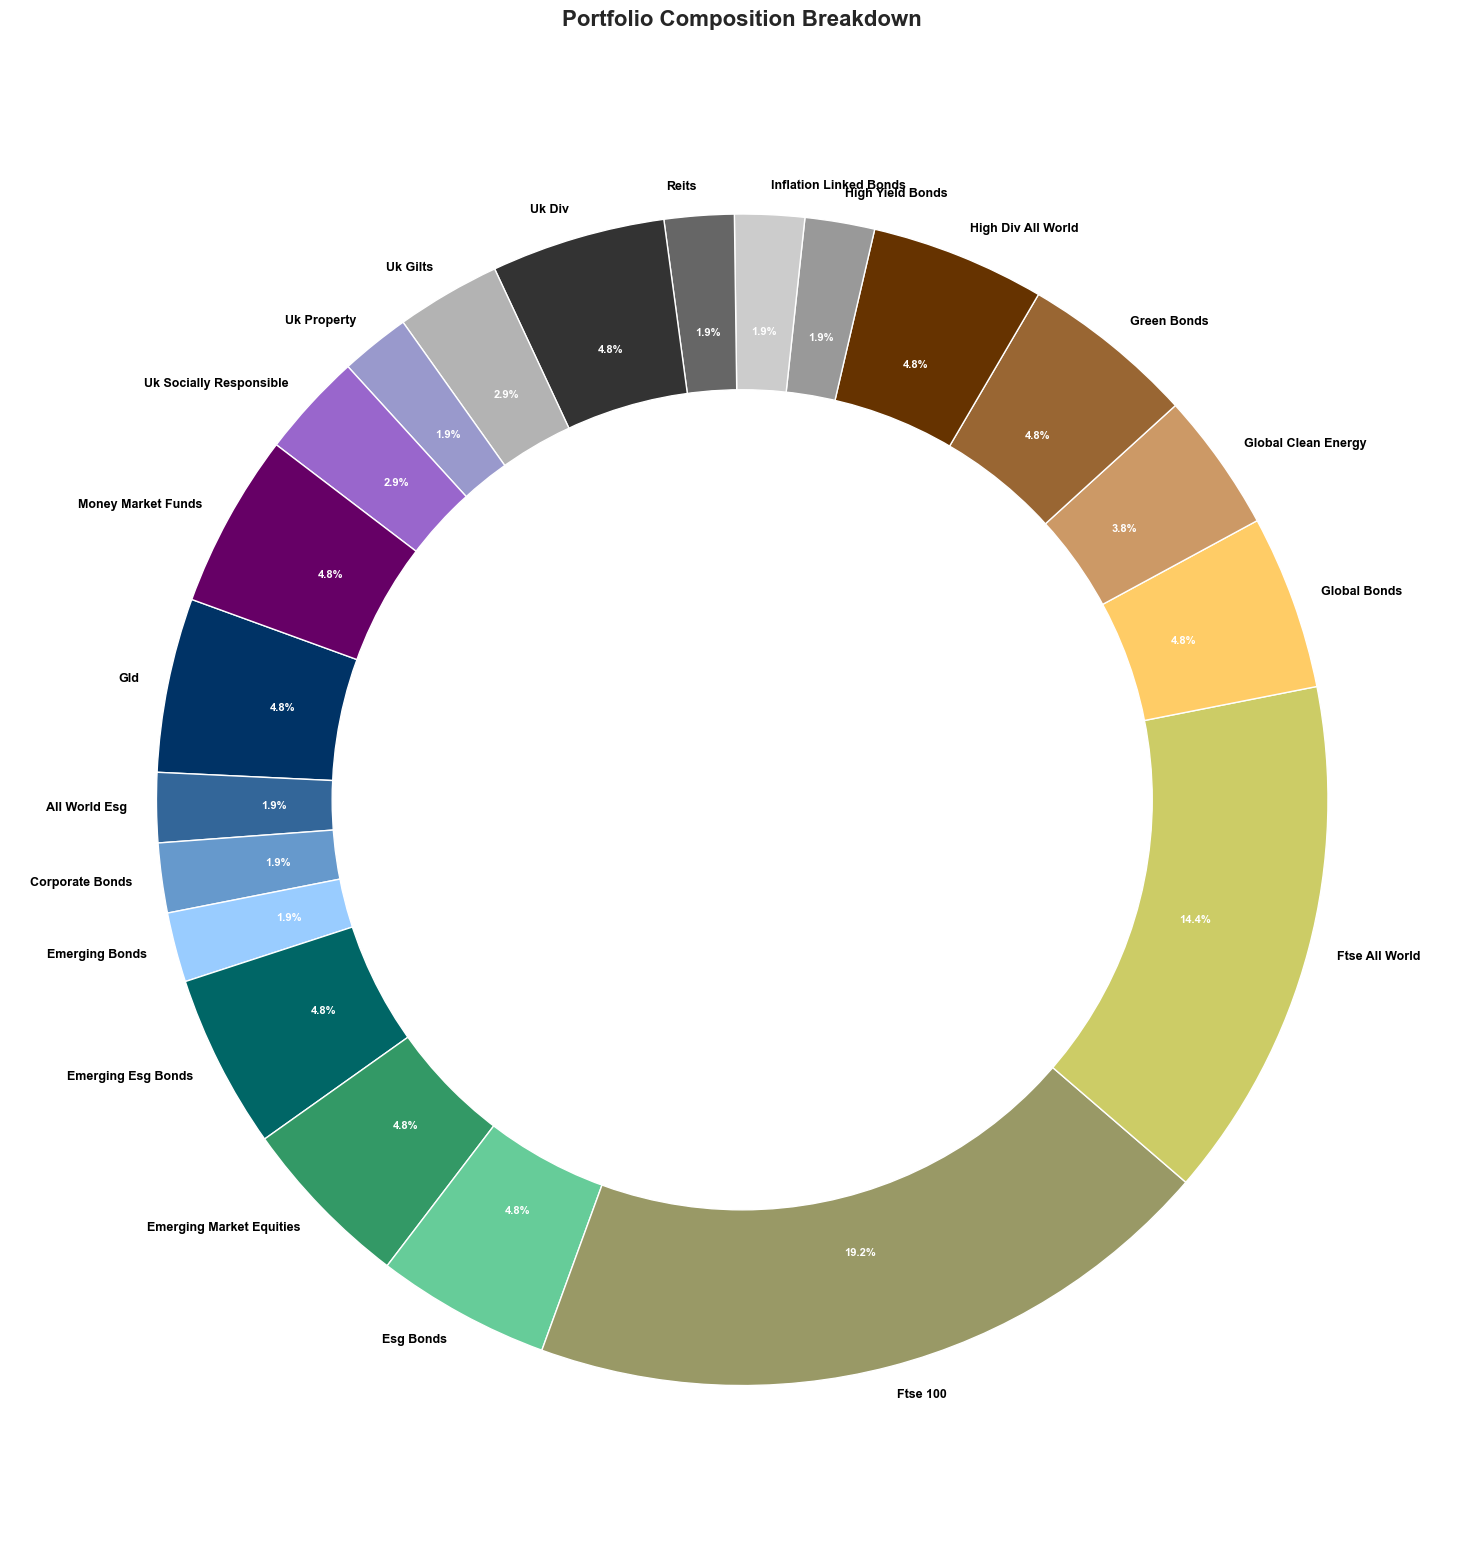

In [50]:
# Portfolio weights
weights = {
    'gld': 0.05,
    'all_world_esg': 0.02,
    'corporate_bonds': 0.02,
    'emerging_bonds': 0.02,
    'emerging_esg_bonds': 0.05,
    'emerging_market_equities': 0.05,
    'esg_bonds': 0.05,
    'ftse_100': 0.20,
    'ftse_all_world': 0.15,
    'global_bonds': 0.05,
    'global_clean_energy': 0.04,
    'green_bonds': 0.05,
    'high_div_all_world': 0.05,
    'high_yield_bonds': 0.02,
    'inflation_linked_bonds': 0.02,
    'reits': 0.02,
    'uk_div': 0.05,
    'uk_gilts': 0.03,
    'uk_property': 0.02,
    'uk_socially_responsible': 0.03,
    'money_market_funds': 0.05
}

# Prettify asset names
def prettify(name):
    return name.replace('_', ' ').title()

labels = [prettify(k) for k in weights.keys()]
sizes = list(weights.values())

# Elegant McKinsey-style color palette
colors = [
    "#003366", "#336699", "#6699CC", "#99CCFF", "#006666", "#339966", "#66CC99",
    "#999966", "#CCCC66", "#FFCC66", "#CC9966", "#996633", "#663300", "#999999",
    "#CCCCCC", "#666666", "#333333", "#B3B3B3", "#9999CC", "#9966CC", "#660066"
]

# Create figure
fig, ax = plt.subplots(figsize=(15, 30))

# Pie chart
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors[:len(sizes)],
    autopct='%1.1f%%',
    pctdistance=0.8,
    labeldistance=1.05,
    startangle=160,
    wedgeprops=dict(edgecolor='white', linewidth=1),
    textprops=dict(color="black", fontsize=9),
)

# Style text labels
for text in texts:
    text.set_fontweight('bold')
    text.set_fontsize(9)

for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Add center circle for donut style (optional, uncomment if preferred)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Title
plt.title('Portfolio Composition Breakdown', fontsize=16, fontweight='bold', pad=30)

# Layout
plt.tight_layout()
plt.show()